In [9]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def imagen_a_array(image_path):
    # Cargar la imagen
    img = Image.open(image_path).convert('RGB')
    
    # Convertir la imagen a un array numpy y asegurar que sea de tipo uint8
    img_array = np.array(img, dtype=np.uint8)
    
    return img_array

In [11]:
def mostrar_array_con_mat(img_array):
   # Verificar que el array sea numérico (asegurar que no sea de tipo object)
    if img_array.dtype == 'object':
        img_array = img_array.astype(np.uint8)

    # Mostrar la imagen usando matplotlib
    plt.imshow(img_array)
    plt.axis('off')  # Desactivar los ejes
    plt.show()

In [16]:
def agregar_array_a_dataset(img_array, objetivo_value,csv_path):
    # Intentar cargar el CSV, si no existe, crear un DataFrame vacío
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        df = pd.DataFrame(columns=['data', 'target'])

    # Crear la nueva fila con los datos
    nueva_fila = pd.DataFrame({'data': [img_array], 'target': [objetivo_value]})

    # Concatenar la nueva fila al DataFrame existente en axis=0 (nuevas filas)
    df = pd.concat([df, nueva_fila], axis=0)

    # Guardar el DataFrame actualizado en el archivo CSV
    df.to_csv(csv_path, index=False)
    print(f"Dataset actualizado guardado en {csv_path}")

In [13]:
# Usar la función con una imagen de prueba
image_path = "Ford-Logo-PNG-Clipart.png"
img_array=imagen_a_array(image_path)

In [20]:
# Definir un valor objetivo (puedes cambiar esto según sea necesario)
objetivo_value = 'Ford'

# Guardar el array en un dataset (archivo CSV) en una fila y columna
csv_path = 'dataset_imagen.csv'
agregar_array_a_dataset(img_array, objetivo_value,csv_path )

Dataset actualizado guardado en dataset_imagen.csv


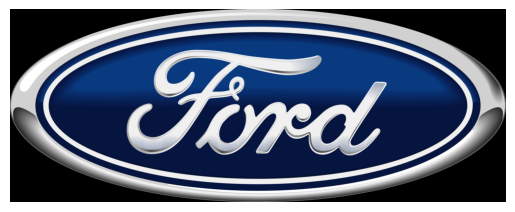

In [7]:
mostrar_array_con_mat(img_array)